In [34]:
import numpy as np
from utils.common_functions import get_emotions, get_sentiment_dict, get_trends
emotions = list(get_emotions().values())
trends = get_trends()
sentiment_dict = get_sentiment_dict()
print(sentiment_dict)
sentiments = list(sentiment_dict.keys())
print(sentiment_dict.keys())

{'positive': ['amusement', 'excitement', 'joy', 'love', 'desire', 'optimism', 'caring', 'pride', 'admiration', 'gratitude', 'relief', 'approval'], 'negative': ['fear', 'nervousness', 'remorse', 'embarrassment', 'disappointment', 'sadness', 'grief', 'disgust', 'anger', 'annoyance', 'disapproval'], 'ambiguous': ['realization', 'surprise', 'curiosity', 'confusion'], 'neutral': ['neutral']}
dict_keys(['positive', 'negative', 'ambiguous', 'neutral'])


In [35]:
import pandas as pd
df = pd.read_csv('/home/siu856533724/code/source-code/Social-Networks/Trend-Prediction/DataSet/trend-data/filename.csv')

In [36]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [37]:
trends[0] = 'approval.1'

In [38]:
df_list = []
for trend in trends:
    # if trend != 'neither':
    df_list.append(df[df[trend]==1.0])

In [39]:
for i, df_temp in enumerate(df_list):
    # if trends[i] != 'neither':
    if trends[i] == 'neither':
        df_list[i] = df_temp[sentiment_dict['ambiguous']]
    elif trends[i] != 'approval.1':
        df_list[i] = df_temp[sentiment_dict['negative']]
    else:
        df_list[i] = df_temp[sentiment_dict['positive']]

In [40]:
for i, df_temp in enumerate(df_list):
    print(df_temp.head())

       amusement  excitement       joy      love    desire  optimism  \
57233   0.001040    0.000552  0.000343  0.000180  0.000530  0.001366   
57234   0.000490    0.003442  0.000734  0.001596  0.001971  0.008166   
57235   0.000598    0.000267  0.000259  0.000110  0.000742  0.005863   
57236   0.000815    0.001913  0.001592  0.000474  0.000639  0.001041   
57237   0.000950    0.000326  0.000316  0.000149  0.000743  0.005939   

         caring     pride  admiration  gratitude    relief  approval  
57233  0.003470  0.000685    0.002357   0.001196  0.000444  0.005623  
57234  0.005526  0.001086    0.004066   0.000457  0.000685  0.017145  
57235  0.004353  0.000513    0.000599   0.000194  0.000546  0.017970  
57236  0.000823  0.000983    0.005752   0.000371  0.000160  0.008805  
57237  0.002205  0.002561    0.009738   0.001714  0.000584  0.068702  
        fear  nervousness   remorse  embarrassment  disappointment   sadness  \
0   0.001136     0.001314  0.001084       0.004389        0.0

In [41]:
# Drop rows where any cell value is less than 0.05
# df2 = df2[df2.apply(lambda row: (row >= 0.10), axis=1)]

for i, df_temp in enumerate(df_list):
    df_list[i] = df_temp[df_temp.apply(lambda row: (row >= 0.10), axis=1)]

In [42]:
# df_filled = df2.fillna(0)

for i, df_temp in enumerate(df_list):
    df_list[i] = df_temp.fillna(0)

In [43]:
# Drop rows where all values are 0
# df_new = df_filled.loc[(df_filled != 0).any(axis=1)]

for i, df_temp in enumerate(df_list):
    df_list[i] = df_temp.loc[(df_temp != 0).any(axis=1)]

In [44]:
df_list[0]

,amusement,excitement,joy,love,desire,optimism,caring,pride,admiration,gratitude,relief,approval
57241,0.000000,0.0,0.0,0.000000,0.229748,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
57242,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.142993
57243,0.000000,0.0,0.0,0.878795,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
57244,0.000000,0.0,0.0,0.817604,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
57245,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.228936,0.000000,0.0,0.241852
...,...,...,...,...,...,...,...,...,...,...,...,...
74843,0.529646,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
74844,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.617451,0.0,0.000000
74849,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.135176
74851,0.853365,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000


In [45]:
import copy

data_temp = {}
dict_list = []
for i, df_i in enumerate(df_list):
    data_temp['value'] = []
    data_temp['label'] = []
    # print(df_i)
    for index, row in df_i.iterrows():
        val_list = df_i.loc[index][df_i.loc[index] > 0.0].values
        label_list = df_i.columns[df_i.loc[index] > 0.0].tolist()
        for (val, label) in zip(val_list, label_list):
            data_temp['value'].append(val)
            data_temp['label'].append(label)
    dict_list.append(copy.deepcopy(data_temp))

In [46]:
plot_df_list = []
for data_temp in dict_list:
    plot_df_list.append(pd.DataFrame(data=data_temp))

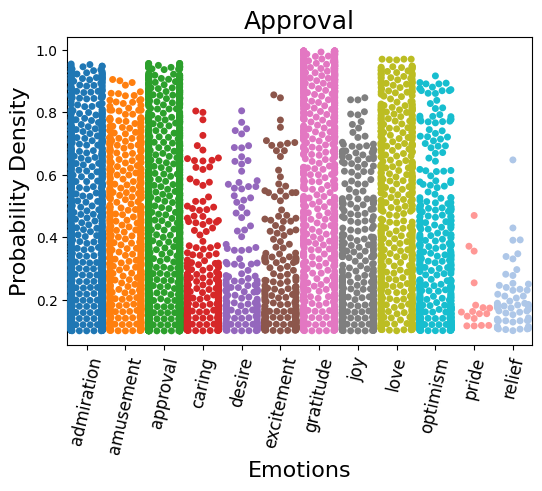

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

# Define a custom color palette with 12 different colors
custom_palette = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
    '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ff9896', '#aec7e8',
    '#ffbb78'
]

# Create a dictionary mapping emotions to colors
emotion_colors = dict(zip(sentiment_dict['positive']
                          , custom_palette))

sentiment_dict['positive'].sort()

plt.figure(figsize=(6, 4))
sns.swarmplot(x="label", y="value", data=plot_df_list[0], palette=emotion_colors, order=sentiment_dict['positive'])
plt.xlabel('Emotions', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.title('Approval', fontsize=18)
plt.xticks(rotation=77, fontsize=12)
plt.show()

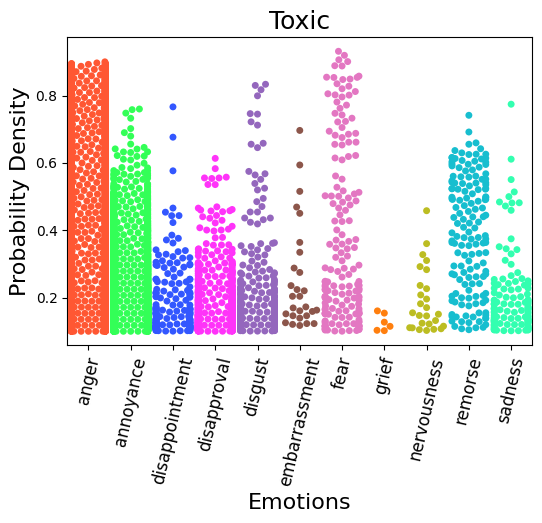

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')
# Your code here...

# Define a custom color palette with 12 different colors
custom_palette = [
    '#FF5733', '#33FF57', '#3357FF', '#FF33F9', '#9467bd', '#8c564b',
    '#e377c2', '#ff7f0e', '#bcbd22', '#17becf', '#33FFB0'
]

# Create a dictionary mapping emotions to colors
emotion_colors = dict(zip(sentiment_dict['negative']
                          , custom_palette))

sentiment_dict['negative'].sort()

plt.figure(figsize=(6, 4))
sns.swarmplot(x="label", y="value", data=plot_df_list[1], palette=emotion_colors, order=sentiment_dict['negative'])
plt.xlabel('Emotions', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.title('Toxic', fontsize=18)
plt.xticks(rotation=77, fontsize=12)
plt.show()

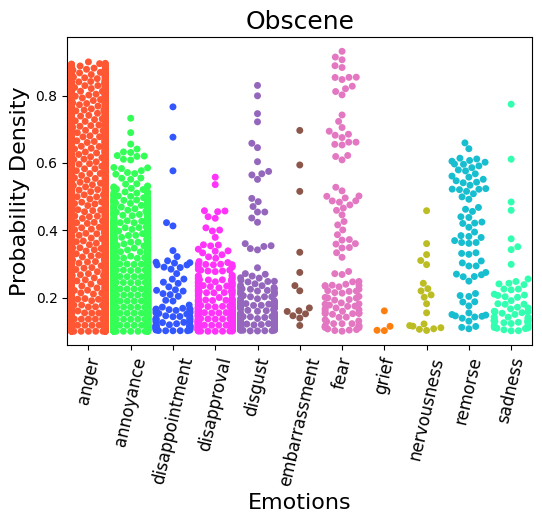

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')
# Your code here...


# Define a custom color palette with 12 different colors
custom_palette = [
    '#FF5733', '#33FF57', '#3357FF', '#FF33F9', '#9467bd', '#8c564b',
    '#e377c2', '#ff7f0e', '#bcbd22', '#17becf', '#33FFB0'
]

# Create a dictionary mapping emotions to colors
emotion_colors = dict(zip(sentiment_dict['negative']
                          , custom_palette))


plt.figure(figsize=(6, 4))
sns.swarmplot(x="label", y="value", data=plot_df_list[2], palette=emotion_colors, order=sentiment_dict['negative'])
plt.xlabel('Emotions', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.title('Obscene', fontsize=18)
plt.xticks(rotation=77, fontsize=12)
plt.show()

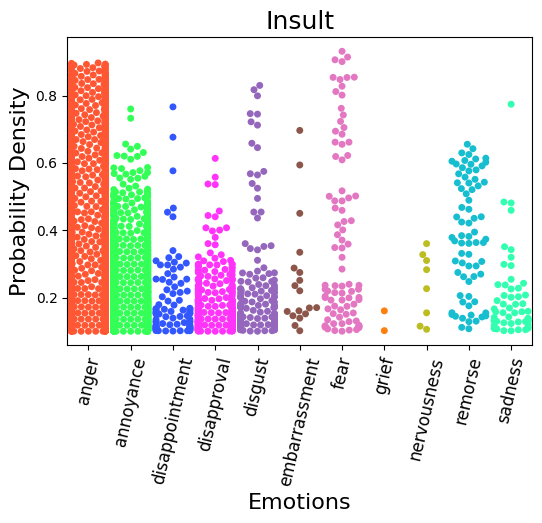

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')
# Your code here...

# Define a custom color palette with 12 different colors
custom_palette = [
    '#FF5733', '#33FF57', '#3357FF', '#FF33F9', '#9467bd', '#8c564b',
    '#e377c2', '#ff7f0e', '#bcbd22', '#17becf', '#33FFB0'
]

# Create a dictionary mapping emotions to colors
emotion_colors = dict(zip(sentiment_dict['negative']
                          , custom_palette))


plt.figure(figsize=(6, 4))
sns.swarmplot(x="label", y="value", data=plot_df_list[3], palette=emotion_colors, order=sentiment_dict['negative'])
plt.xlabel('Emotions', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.title('Insult', fontsize=18)
plt.xticks(rotation=77, fontsize=12)
plt.show()

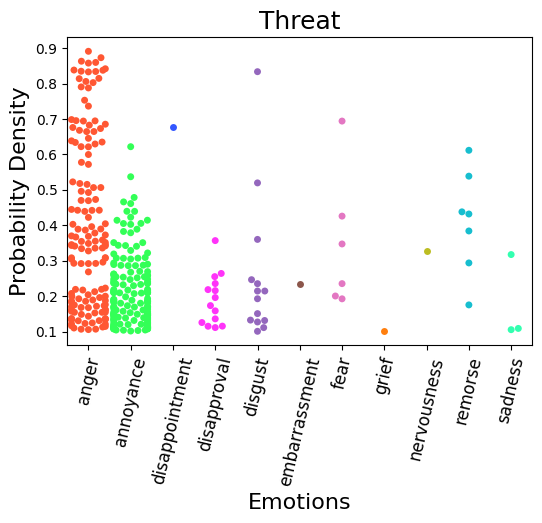

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')
# Your code here...

# Define a custom color palette with 12 different colors
custom_palette = [
    '#FF5733', '#33FF57', '#3357FF', '#FF33F9', '#9467bd', '#8c564b',
    '#e377c2', '#ff7f0e', '#bcbd22', '#17becf', '#33FFB0'
]

# Create a dictionary mapping emotions to colors
emotion_colors = dict(zip(sentiment_dict['negative']
                          , custom_palette))

plt.figure(figsize=(6, 4))
sns.swarmplot(x="label", y="value", data=plot_df_list[4], palette=emotion_colors, order=sentiment_dict['negative'])
plt.xlabel('Emotions', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.title('Threat', fontsize=18)
plt.xticks(rotation=77, fontsize=12)
plt.show()

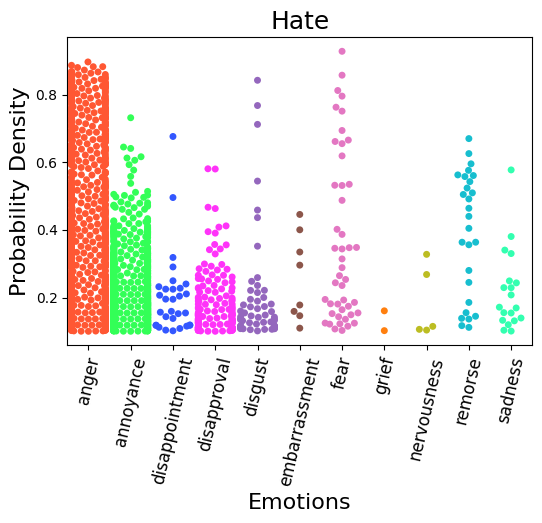

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')
# Your code here...

# Define a custom color palette with 12 different colors
custom_palette = [
    '#FF5733', '#33FF57', '#3357FF', '#FF33F9', '#9467bd', '#8c564b',
    '#e377c2', '#ff7f0e', '#bcbd22', '#17becf', '#33FFB0'
]

# Create a dictionary mapping emotions to colors
emotion_colors = dict(zip(sentiment_dict['negative']
                          , custom_palette))


plt.figure(figsize=(6, 4))
sns.swarmplot(x="label", y="value", data=plot_df_list[5], palette=emotion_colors, order=sentiment_dict['negative'])
plt.xlabel('Emotions', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.title('Hate', fontsize=18)
plt.xticks(rotation=77, fontsize=12)
plt.show()

In [74]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import warnings
# # Ignore all warnings
# warnings.filterwarnings('ignore')
# # Your code here...

# # Define a custom color palette with 12 different colors
# custom_palette = [
#     '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
#     '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ff9896', '#aec7e8',
#     '#ffbb78'
# ]

# # Create a dictionary mapping emotions to colors
# emotion_colors = dict(zip(sentiment_dict['negative']
#                           , custom_palette))


# plt.figure(figsize=(6, 4))
# sns.swarmplot(x="label", y="value", data=plot_df_list[5], palette=emotion_colors, order=sentiment_dict['negative'])
# plt.xlabel('Emotions')
# plt.ylabel('Probability Density')
# plt.title('Hate')
# plt.xticks(rotation=77)
# plt.show()

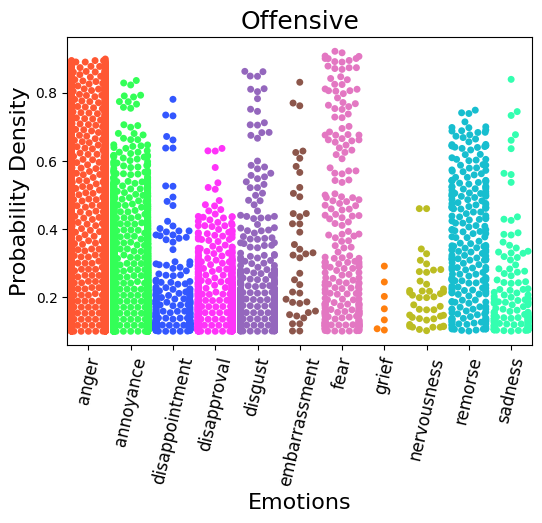

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')
# Your code here...

# Define a custom color palette with 12 different colors
custom_palette = [
    '#FF5733', '#33FF57', '#3357FF', '#FF33F9', '#9467bd', '#8c564b',
    '#e377c2', '#ff7f0e', '#bcbd22', '#17becf', '#33FFB0'
]

# Create a dictionary mapping emotions to colors
emotion_colors = dict(zip(sentiment_dict['negative']
                          , custom_palette))


plt.figure(figsize=(6, 4))
sns.swarmplot(x="label", y="value", data=plot_df_list[6], palette=emotion_colors, order=sentiment_dict['negative'])
plt.xlabel('Emotions', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.title('Offensive', fontsize=18)
plt.xticks(rotation=77, fontsize=12)
plt.show()

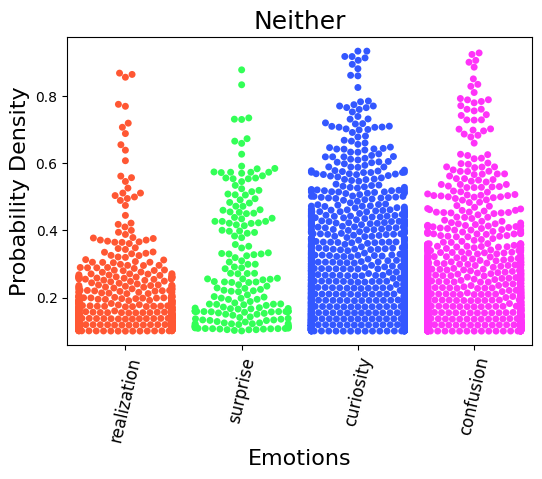

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')
# Your code here...

# Define a custom color palette with 12 different colors
custom_palette = [
    '#FF5733', '#33FF57', '#3357FF', '#FF33F9'
]

# Create a dictionary mapping emotions to colors
emotion_colors = dict(zip(sentiment_dict['ambiguous']
                          , custom_palette))


plt.figure(figsize=(6, 4))
sns.swarmplot(x="label", y="value", data=plot_df_list[7], palette=emotion_colors, order=sentiment_dict['ambiguous'])
plt.xlabel('Emotions', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.title('Neither', fontsize=18)
plt.xticks(rotation=77, fontsize=12)
plt.show()

In [ ]:
df_min_max = []
for i, df_temp in enumerate(df_list):
    df_temp1= [trends[i]]
    for col in df_temp.columns:
        max_val = df_temp[col].max()
        min_val = df_temp[col].min()
        immediate_greater = df_temp[df_temp[col] > min_val][col].iloc[0] 
        df_temp1.append(str(f'{immediate_greater} -  {max_val}'))
    df_min_max.append(df_temp1)

In [ ]:
columns = copy.deepcopy(sentiment_dict['negative'])
columns.insert(0, 'Trend')

In [ ]:
df = pd.DataFrame(df_min_max[1:], columns=columns)

In [ ]:
df

In [ ]:
columns = copy.deepcopy(sentiment_dict['positive'])
columns.insert(0, 'Trend')

In [ ]:

df = pd.DataFrame([df_min_max[0]], columns=columns)

In [ ]:
df

In [ ]:
np.random.uniform(0.26936904, 0.904611, size=5)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Generating sample range data
np.random.seed(10)
data = np.random.rand(100, 8)
df = pd.DataFrame(data, columns=[f"Column_{i+1}" for i in range(8)])

# Plotting Box Plots
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df.boxplot()
plt.title('Box Plot of Range Data')

plt.tight_layout()
plt.show()


## SCALE Paper

In [89]:
import pandas as pd

df = pd.read_csv("/home/siu856533724/code/source-code/Social-Networks/SCALE.csv")

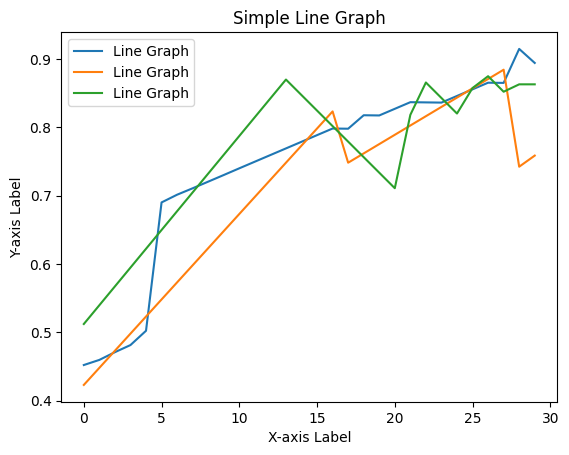

In [92]:
import matplotlib.pyplot as plt

# Sample data
y1 = df.iloc[:, 1]
y2 = df.iloc[:, 2]
y3 = df.iloc[:, 3]
x_values = [i for i in range(df.shape[0])]

# Plotting the line graph
plt.plot(x_values, y1, label='Line Graph')
plt.plot(x_values, y2, label='Line Graph')
plt.plot(x_values, y3, label='Line Graph')

# Adding labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Simple Line Graph')

# Adding a legend (optional)
plt.legend()

# Displaying the graph
plt.show()


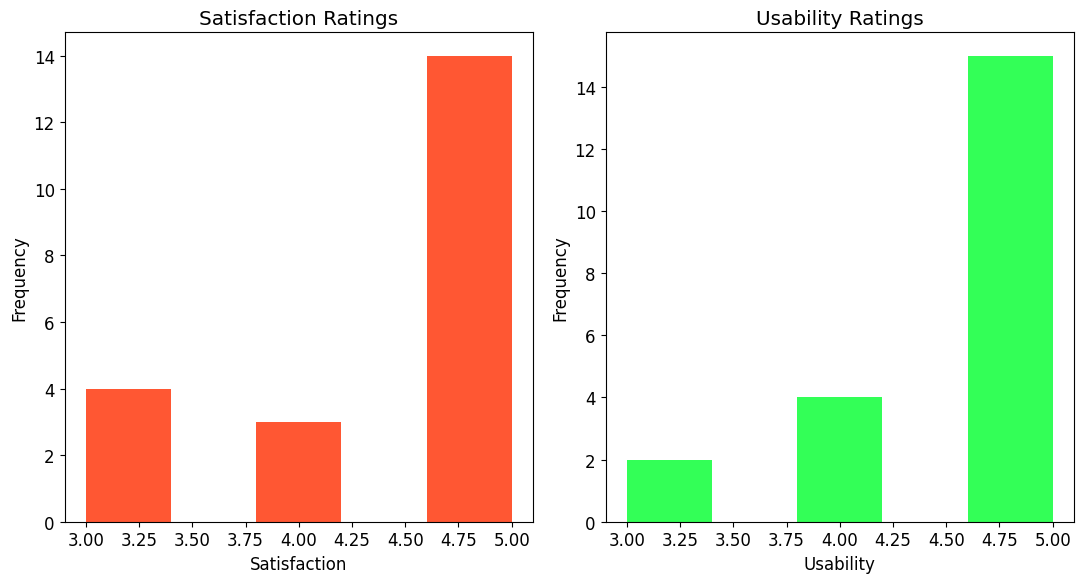

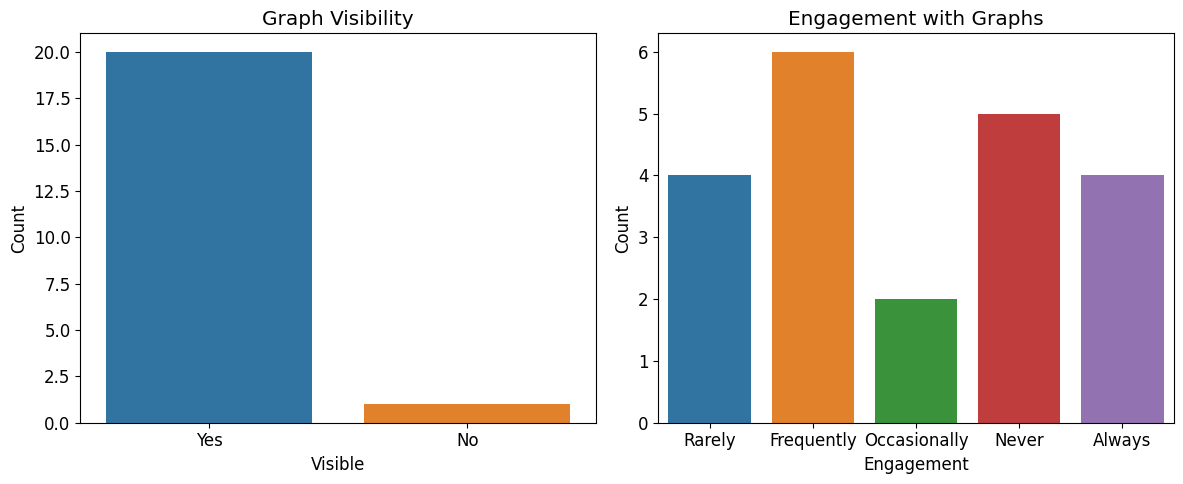

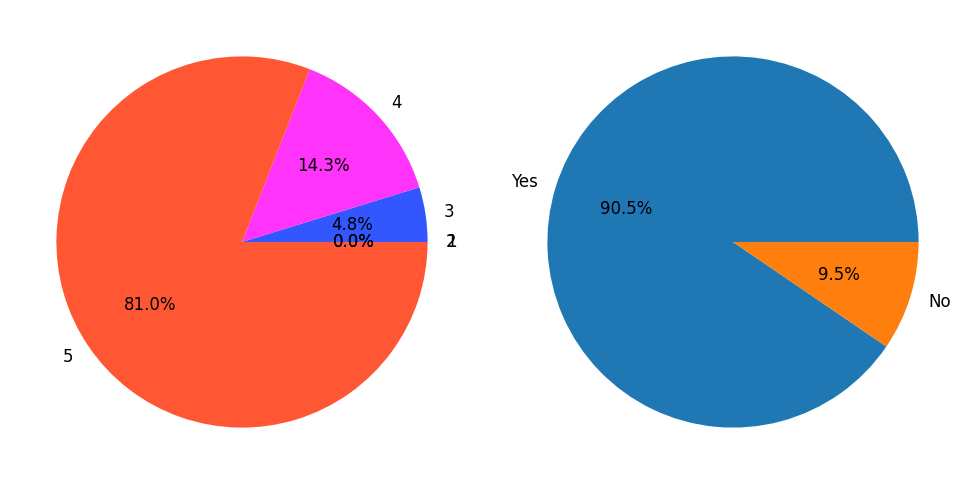

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33F9', '#9467bd', '#8c564b',
    '#e377c2', '#ff7f0e', '#bcbd22', '#17becf', '#33FFB0']

# Dummy data for satisfaction and usability
satisfaction = [5, 5, 3, 3, 5, 5, 5, 5, 4, 5, 4, 5, 5, 3, 5, 5, 5, 3, 5, 5,4]
  # Replace with actual satisfaction data for all users
usability = [5, 5, 3, 3, 5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 4,5]
     # Replace with actual usability data for all users

# Plotting satisfaction and usability ratings
plt.figure(figsize=(11, 6))

plt.subplot(1, 2, 1)
plt.hist(satisfaction, bins=5, color=colors[0])
plt.title('Satisfaction Ratings')
plt.xlabel('Satisfaction')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(usability, bins=5, color=colors[1])
plt.title('Usability Ratings')
plt.xlabel('Usability')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Dummy data for graph visibility and engagement
graph_visibility = ["Yes", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"]
 # Replace with actual visibility data for all users
engagement = ["Rarely", "Frequently", "Occasionally", "Never", "Never", "Never", "Rarely", "Never", "Never", "Occasionally", "Rarely", "Always", "Always", "Frequently", "Frequently", "Always", "Always", "Frequently", "Frequently", "Frequently", "Rarely"]
  # Replace with actual engagement data for all users

# Countplot for graph visibility
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=graph_visibility)
plt.title('Graph Visibility')
plt.xlabel('Visible')
plt.ylabel('Count')

# Countplot for engagement with graphs
plt.subplot(1, 2, 2)
sns.countplot(x=engagement)
plt.title('Engagement with Graphs')
plt.xlabel('Engagement')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Dummy data for recommendations and future use
recommendations = [5, 4, 4, 3, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
  # Replace with actual recommendation data for all users
future_use = ["Yes"] * 19 # Replace with actual future use data for all users
future_use.append('No')
future_use.append('No')

# Pie chart for recommendations
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
labels = ['1', '2', '3', '4', '5']
sizes = [recommendations.count(1), recommendations.count(2),recommendations.count(3), recommendations.count(4), recommendations.count(5)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=[colors[4], colors[1], colors[2], colors[3], colors[0]])
# plt.title('Recommendations')
plt.rcParams['font.size'] = 12

# Pie chart for future use
plt.subplot(1, 2, 2)
labels = ['Yes', 'No']
sizes = [future_use.count('Yes'), future_use.count('No')]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
# plt.title('Future Use')
# plt.rcParams['font.size'] = 12

plt.tight_layout()
plt.show()
